In [1]:
import torch 

In [5]:
from fastai.vision.all import *


In [10]:
path = Path("C:\\Users\\emil\\Desktop\\flowers")

In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="fastai.torch_core")

dls = ImageDataLoaders.from_folder(path, valid_pct=0.2,
                                  item_tfms=Resize(224),
                                  batch_tfms=aug_transforms())


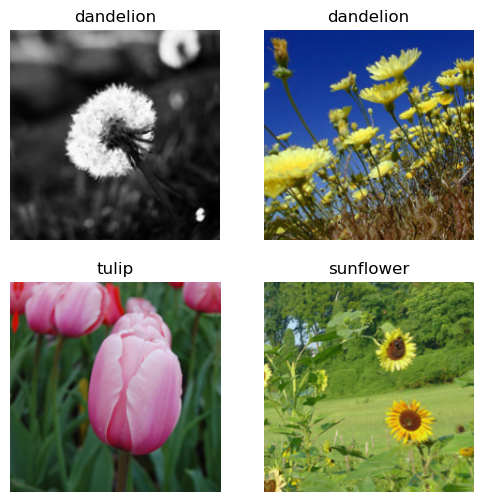

In [24]:
dls.show_batch(max_n=4)


In [25]:
learn = cnn_learner(dls,resnet34, metrics=error_rate)

C:\Users\emil\anaconda3\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(valley=0.0012022644514217973)

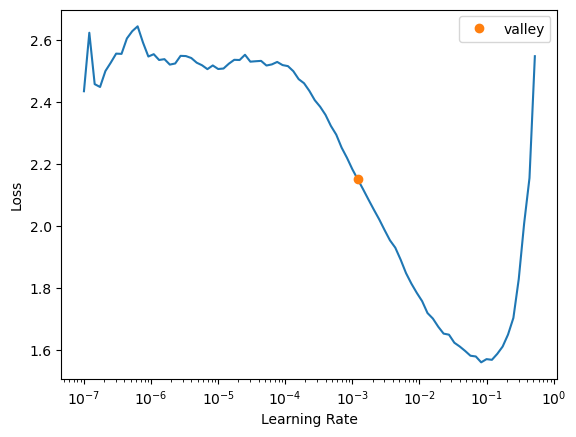

In [26]:
learn.lr_find()

In [27]:
suggested_lr = 0.001

In [28]:
learn.fine_tune(epochs=4, base_lr=suggested_lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.196510,0.437058,0.145833,04:47


epoch,train_loss,valid_loss,error_rate,time
0,0.515279,0.329402,0.107639,11:29
1,0.369049,0.292346,0.089120,07:07
2,0.250226,0.269647,0.079861,06:00
3,0.185312,0.269271,0.086806,06:08


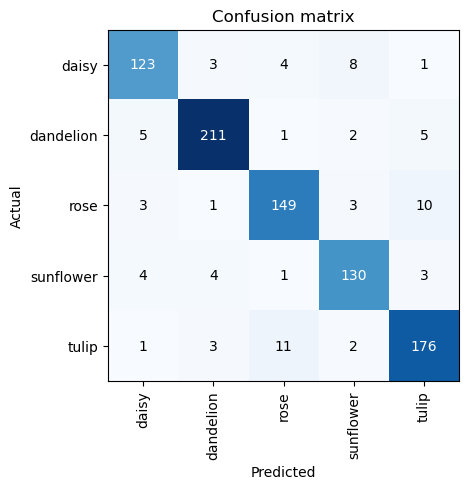

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [31]:

learn.export("flower_classifier.pkl")


Prediction: dandelion; Probability: 0.9382


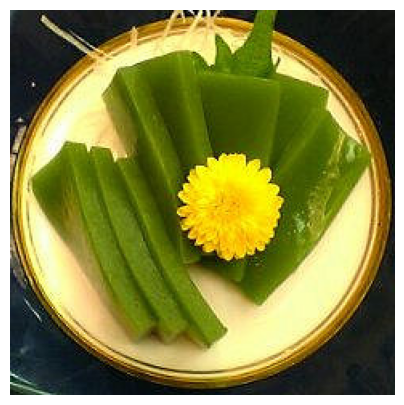

In [41]:
from fastai.vision.all import *

# Load the learner/model
learn = load_learner("C:\\Users\\emil\\Desktop\\flowers\\flower_classifier.pkl")

# Specify the image path
image_path = Path("C:\\Users\\emil\\Desktop\\flowers\\dandelion\\7355522_b66e5d3078_m.jpg")

# Load the image
img = PILImage.create(image_path)

# Make predictions
pred, pred_idx, probs = learn.predict(img)

# Show the image
img.show()

# Print the prediction and probability
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}")


In [42]:
pred_idx

tensor(1)